# Capstone Project - NLP based Chatbot

**Group**: G9

**Batch**: AIML ONLINE JULY 23 A

**Team Members**:
* Anurag Rai
* Neha Gogia
* Prasanalakshmi Venkateswaralu
* Rahul Sagar
* Rohon Kuddus
* Suhail Chand

# Problem Statement

**DOMAIN**: Industrial Safety

**CONTEXT**: <br>
The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION**:<br>
This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Source**: https://www.kaggle.com/datasets/ihmstefanini/industrial-safety-and-health-analytics-database

| Attributes | Description |
| ------------- | ------------- |
| Data | timestamp or time/date information |
| Countries | which country the accident occurred (anonymised) |
| Local | the city where the manufacturing plant is located (anonymised) |
| Industry sector | which sector the plant belongs to |
| Accident level | from I to VI, it registers how severe was the accident (I means not severe but VI means very severe) |
| Potential Accident Level | depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident) |
| Genre | if the person is male of female |
| Employee or Third Party | if the injured person is an employee or a third party |
| Critical Risk | some description of the risk involved in the accident |
| Description | detailed description of how the accident happened | 

**PROJECT OBJECTIVE**:<br>
Design a ML/DL based chatbot utility which can help the professionals to **highlight the safety risk** as per the incident description.

# Imports

In [8]:
import os

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html

# Command to tell Python to actually display the graphs
%matplotlib inline

# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn import svm

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

from scipy import stats

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import pickle

import warnings
warnings.filterwarnings("ignore")

PROJECT_DIR = os.path.join(os.path.dirname('interim.ipynb'), os.pardir) + '/..'

In [9]:
is_df = pd.read_excel(f'{PROJECT_DIR}/data/raw/industrial_safety_and_health_database_with_accidents_description.xlsx')
is_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [10]:
is_df.shape

(425, 11)

In [11]:
# Dataset Info
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


In [12]:
# Missing value count
is_df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [13]:
# Dropping the index column
is_df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
# Duplicates
is_df.duplicated().sum()

7

In [15]:
# Dropping duplicates
is_df.drop_duplicates(inplace=True, ignore_index=True)

In [16]:
print('Value Counts')
print('*'*50)
for col in is_df.columns:
    if col not in ['Data', 'Description']:
        print(is_df[col].value_counts())
        print('-'*50)

Value Counts
**************************************************
Countries
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64
--------------------------------------------------
Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
--------------------------------------------------
Industry Sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64
--------------------------------------------------
Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64
--------------------------------------------------
Potential Accident Level
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: count, dtype: int64
--------------------------------------------------
Genre
Male      396
Female     22
Name: count, dtype: int64
----------------------

In [17]:
# Rename 'Data', 'Countries', 'Genre' columns in Data frame
is_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender'}, inplace=True)

# Univariate Analysis

In [18]:
def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    
    """

    figure,axes = plt.subplots(nrows =1,ncols = 2,figsize=(20,10))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index,ax = axes[1]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:1.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

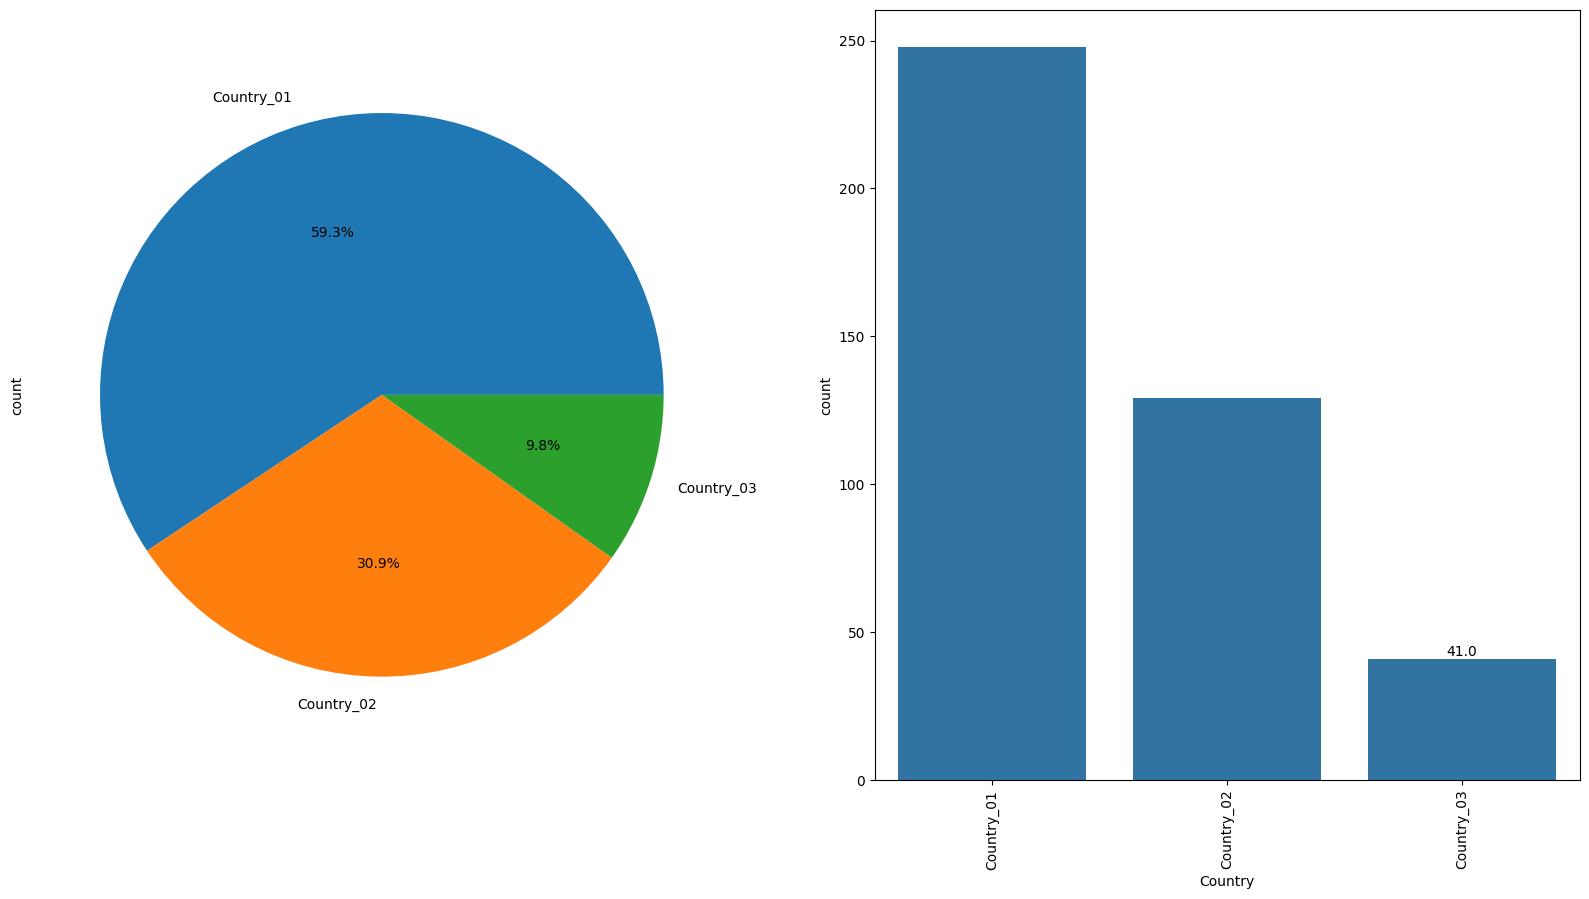

In [19]:
# Country distribution
labeled_barplot(is_df, 'Country', perc=False)

Higher percentage of accidents almost 59% has occured in Country_01 Least percentage of accidents, 9.8% has occurred in Country_03.

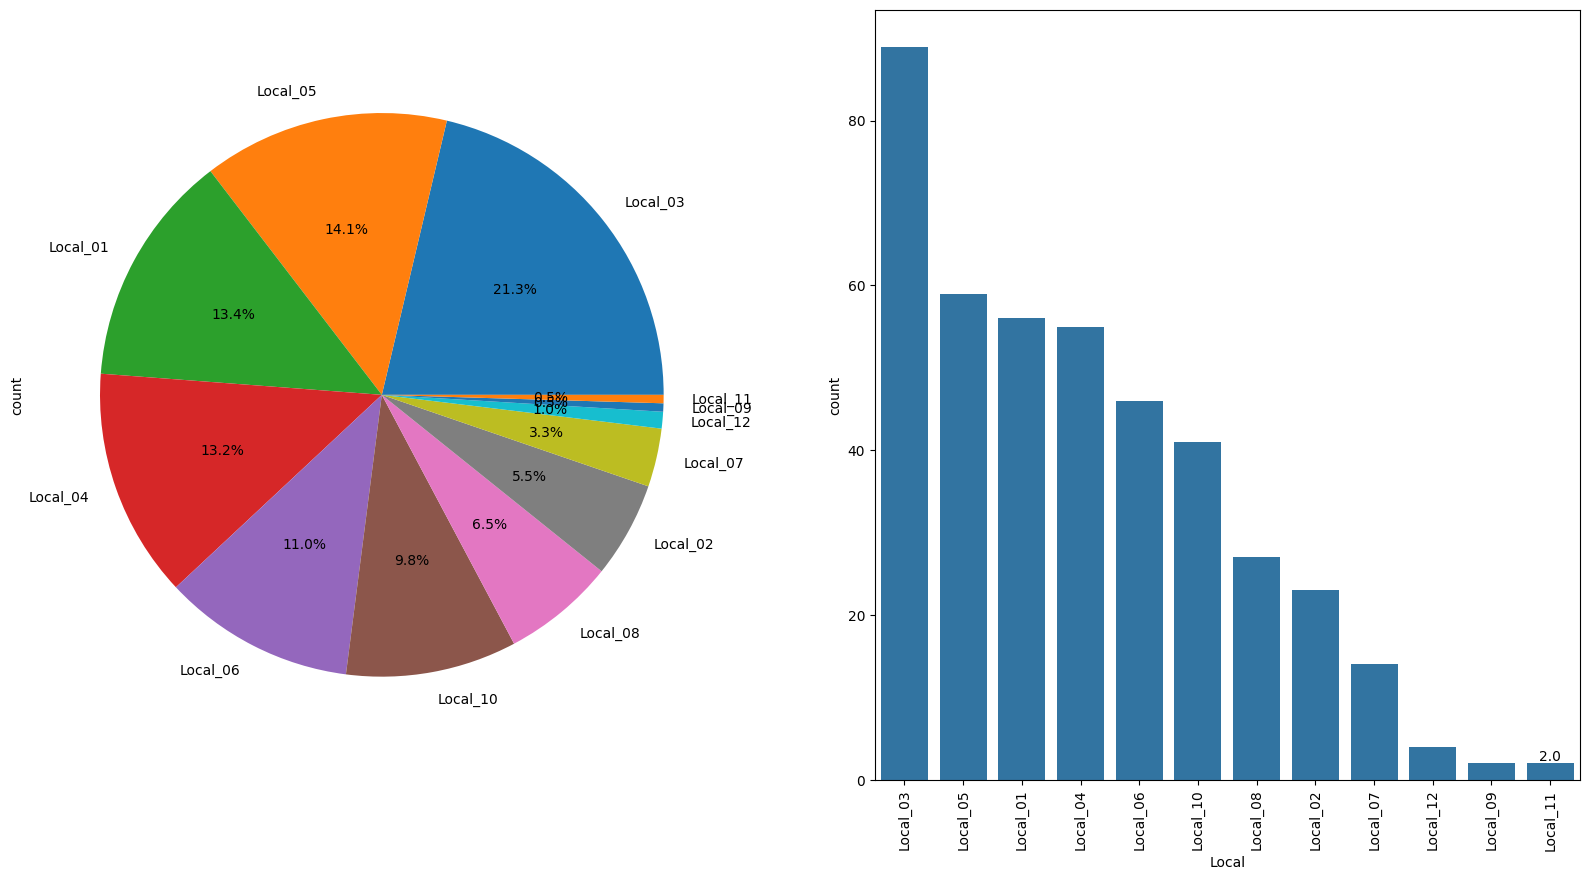

In [20]:
# Local region distribution
labeled_barplot(is_df, 'Local', perc=False)

Higher pecentage of accidents has occured in `Local_03` Second highest accident has occurred in `Local_05`.

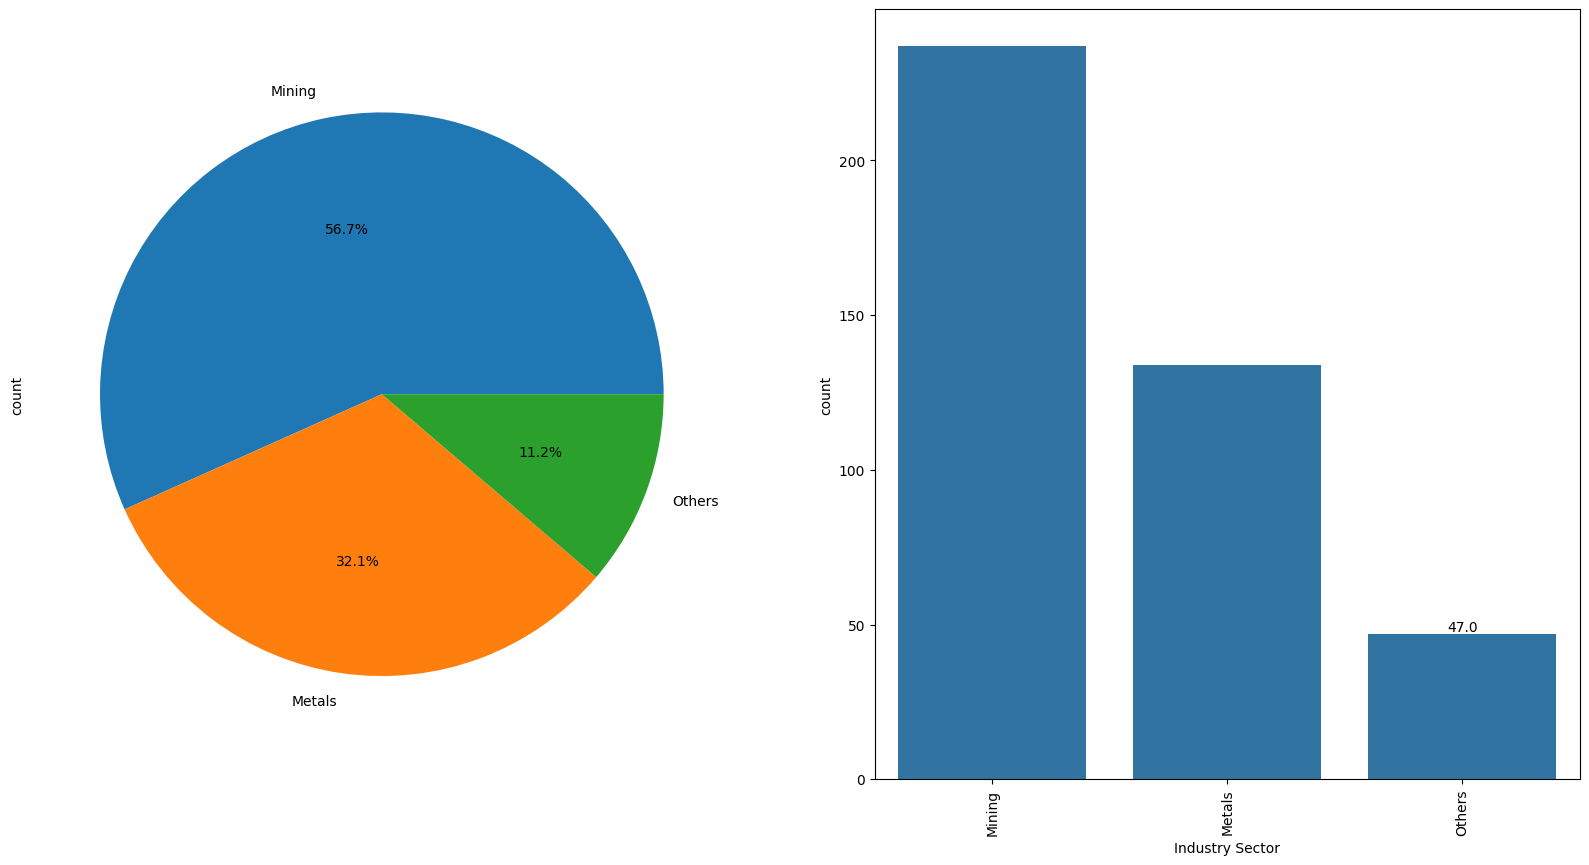

In [21]:
# Industry Sector distribution
labeled_barplot(is_df, 'Industry Sector', perc=False)

Higher percentage, ~ 56.7% of accidents has occurred in Mining industy Second highest in Metals.

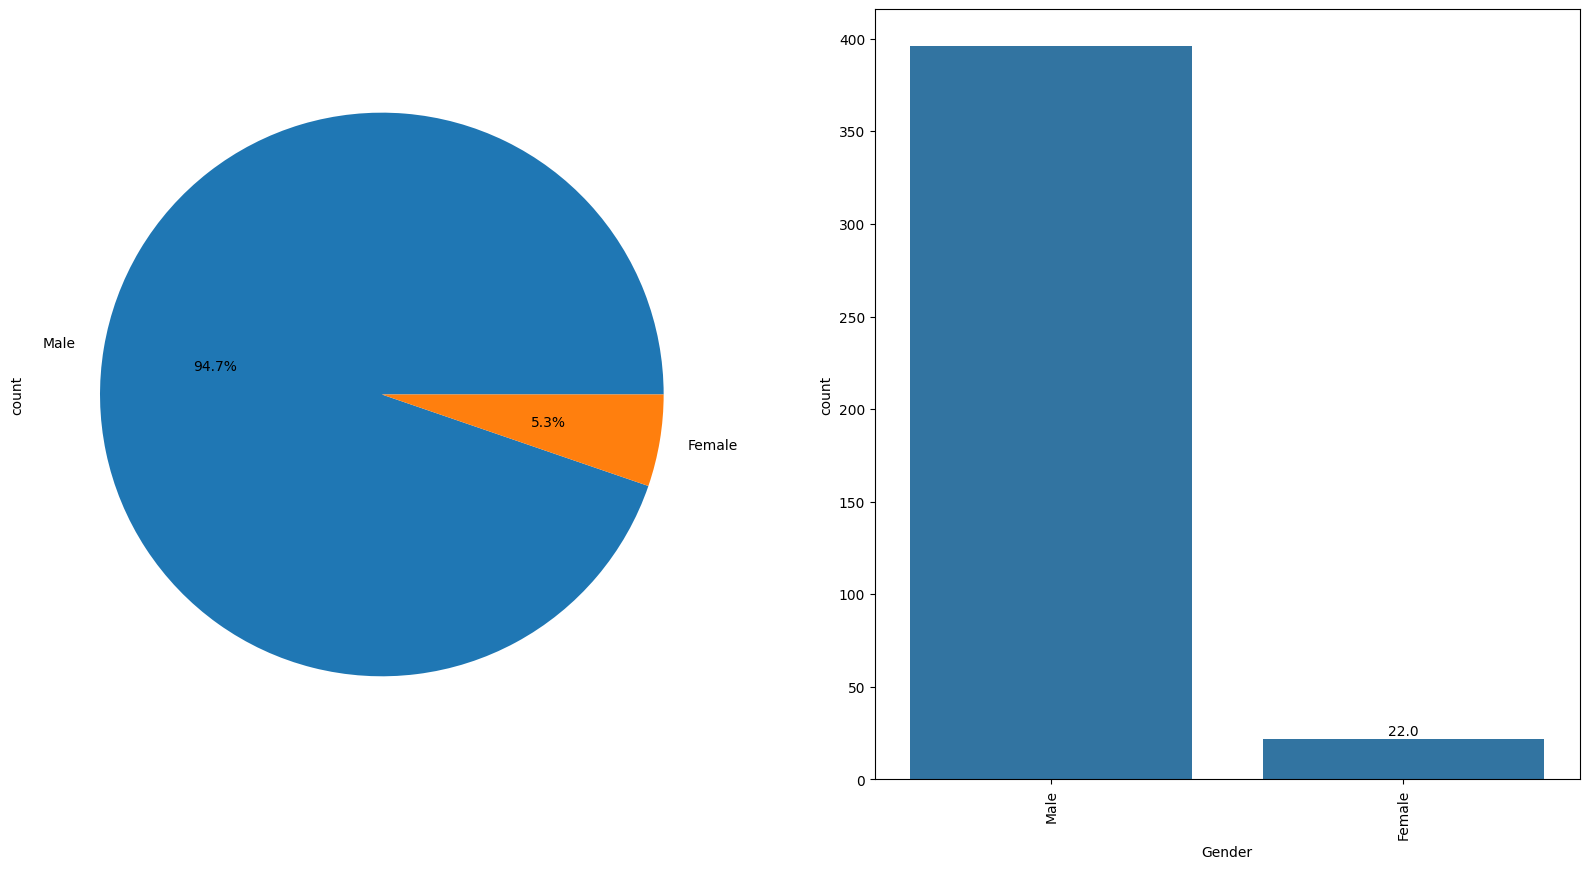

In [22]:
# Gender distribution
labeled_barplot(is_df, 'Gender', perc=False)

Men have undergone higher percentage of accidents around ~94.7% Women has less accident rate.

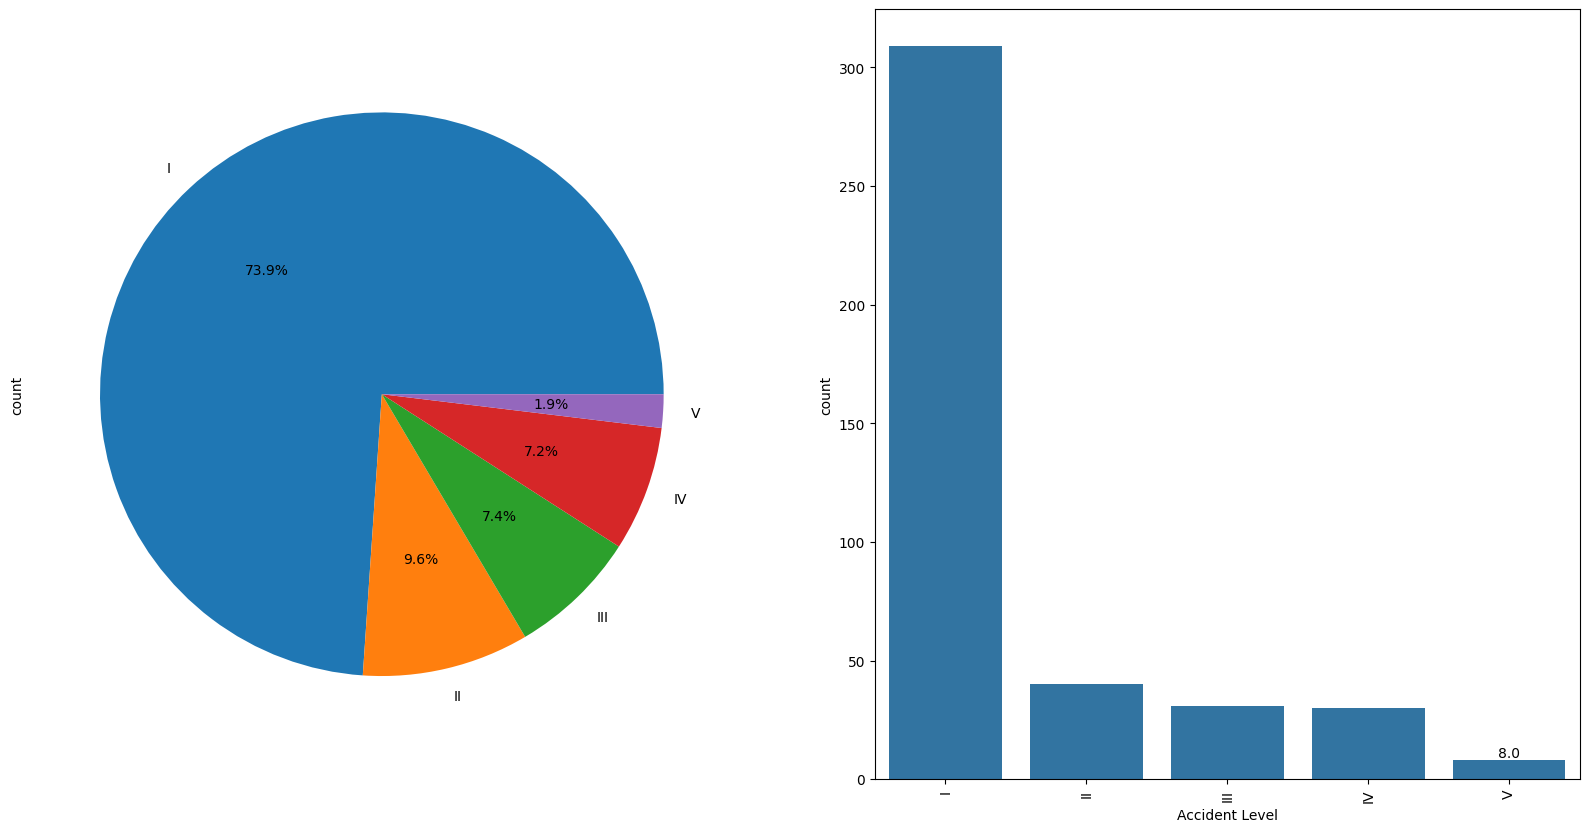

In [23]:
# Accident Level distribution
labeled_barplot(is_df, 'Accident Level', perc=False)

8% of accidents were very severe considering level `V` as highest severe. Higher no of accidents happened are less severe ~ 74 %.

In [24]:
ds = is_df['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

In [25]:
ds.head()

,Critical Risk,count
0,Others,229
1,Pressed,24
2,Manual Tools,20
3,Chemical substances,17
4,Cut,14


Text(0.5, 1.0, 'Top 20 Critical Risk reported...')

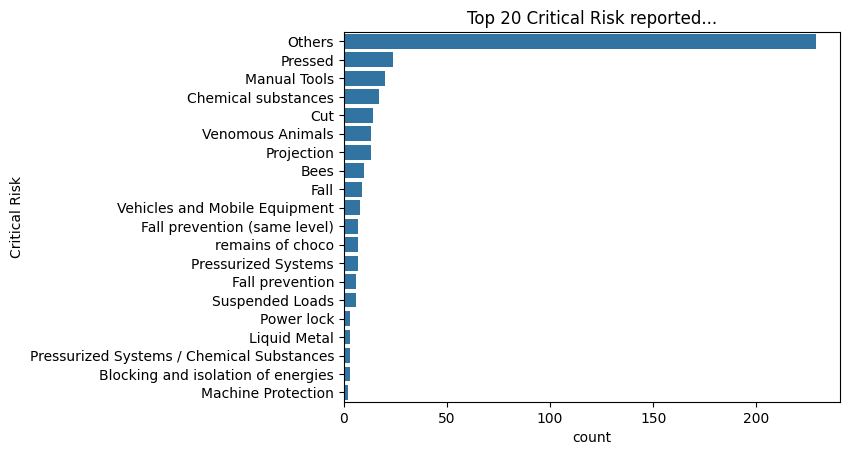

In [26]:
ds = is_df['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

sns.barplot(
    x='count', 
    y='Critical Risk', 
    data = ds.head(20)
).set_title('Top 20 Critical Risk reported...')

Critical risk needs to further collected since most of the falls into other category. Pressed is the second most critical risk reported.

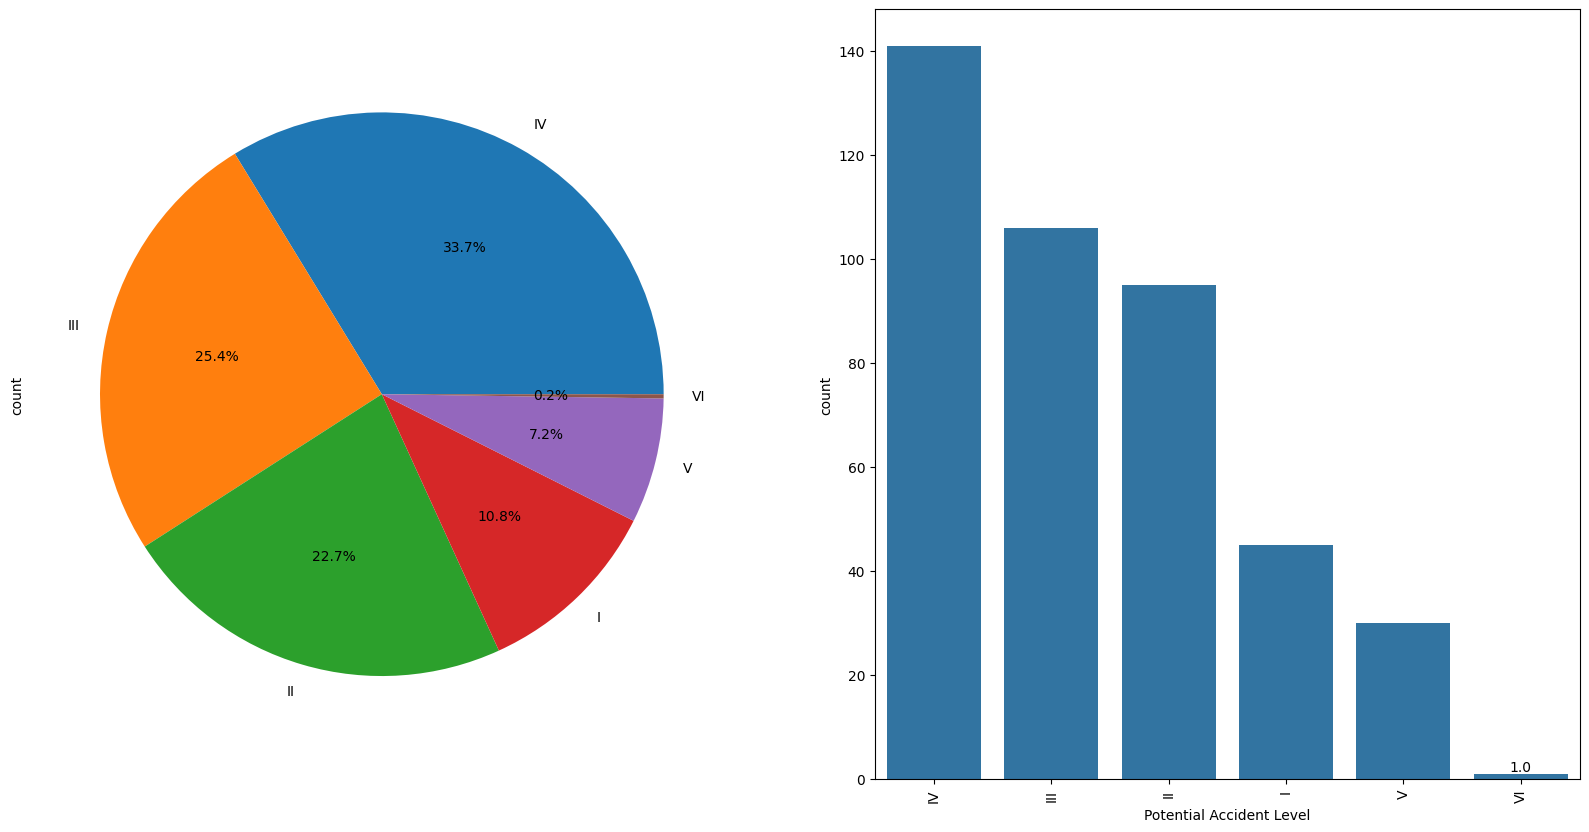

In [27]:
# Potential Accident Level distribution
labeled_barplot(is_df, 'Potential Accident Level', perc=False)

Most of accidents are of potential level `IV`.

# Bivariate Analysis

In [28]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

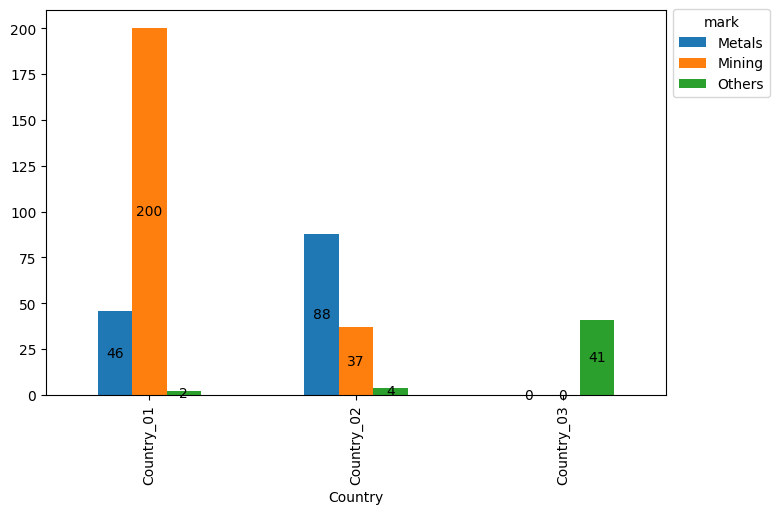

In [29]:
# Check proportion of Industry sector in different countries
crosstab_feature(is_df, 'Country', 'Industry Sector', False)

`Country_01` has highest percentage of accidents occuring is `Mining` industy, `Country_02` has highest percentage of accidents occurring in `Metal` industry, `Country_03` has highest percentage of accidents occurring in `Others` industry.

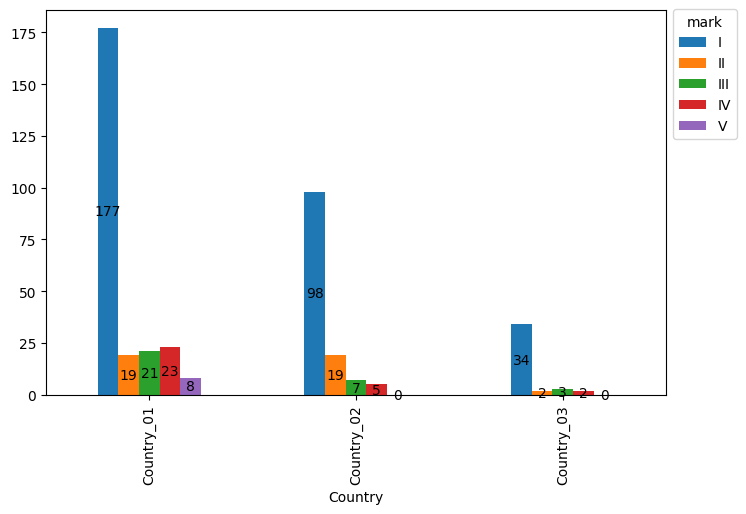

In [30]:
# Proportion of accident level in different coutries
crosstab_feature(is_df, 'Country', 'Accident Level', False)

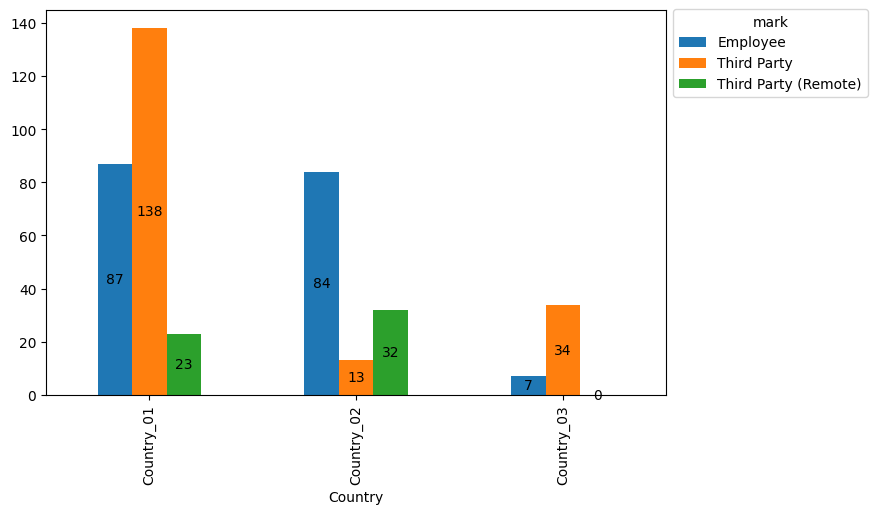

In [31]:
# Proportion of employee type in different coutries
crosstab_feature(is_df,'Country','Employee or Third Party',False)

Third party undergoing more accidents in Country 1 & 3
Employee under country 1 & Country 2 facing same accident rates

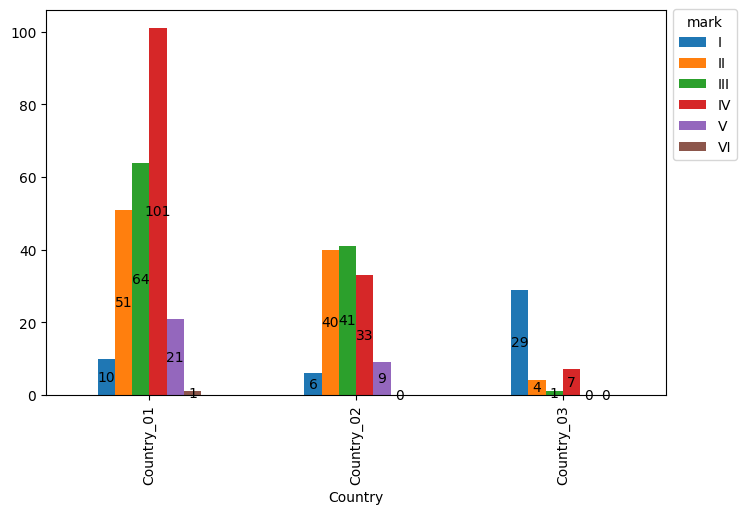

In [32]:
#Proportion of Potential accident level in different coutries
crosstab_feature(is_df,'Country','Potential Accident Level',False)

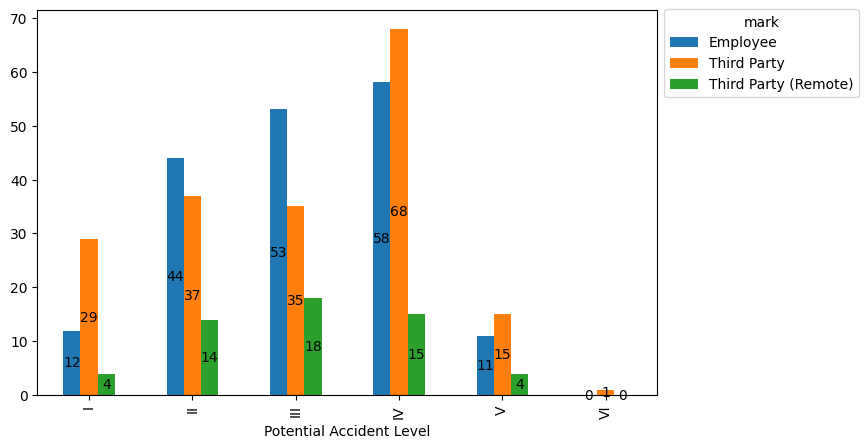

In [33]:
#Potential Accident Level vs Employee Type distribution
crosstab_feature(is_df,'Potential Accident Level','Employee or Third Party',False)

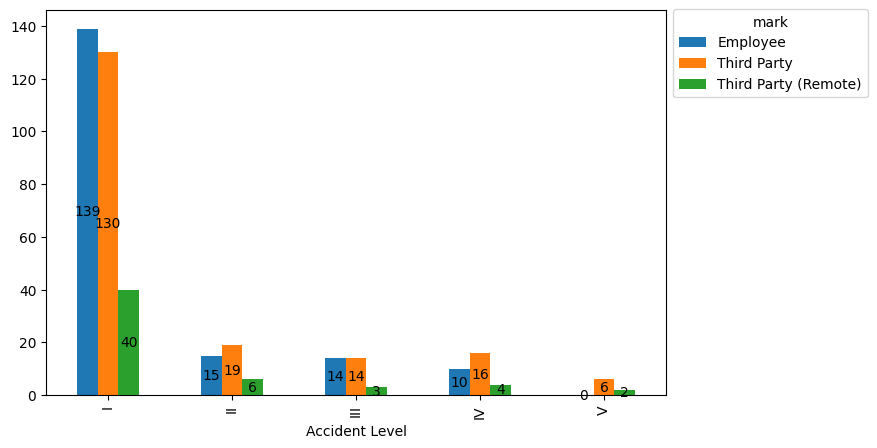

In [34]:
crosstab_feature(is_df,'Accident Level','Employee or Third Party',False)

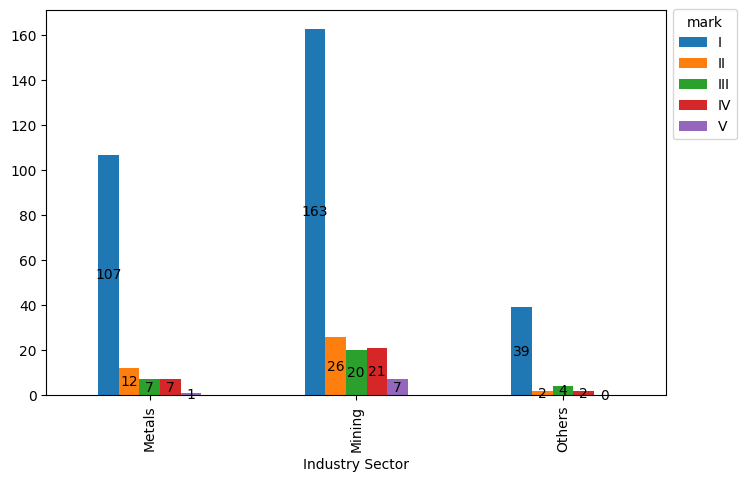

In [35]:
crosstab_feature(is_df,'Industry Sector','Accident Level',False)

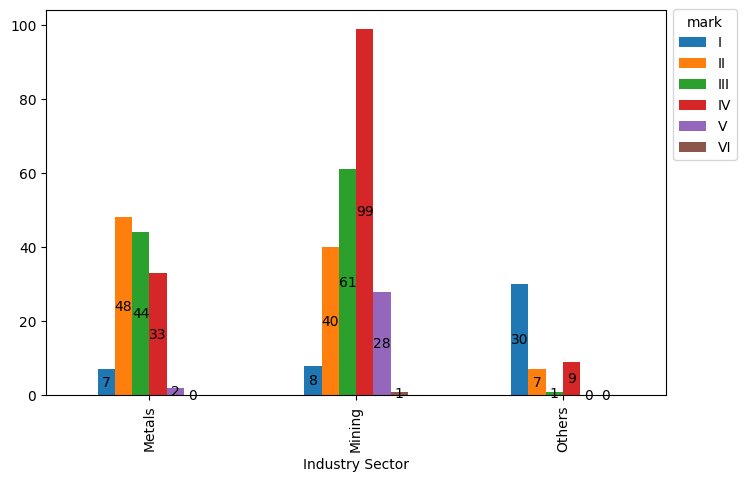

In [36]:
crosstab_feature(is_df,'Industry Sector','Potential Accident Level',False)


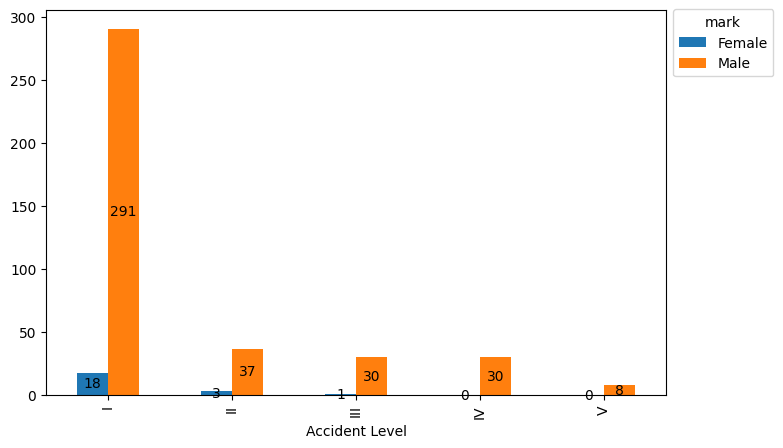

In [37]:
crosstab_feature(is_df,'Accident Level','Gender',False)

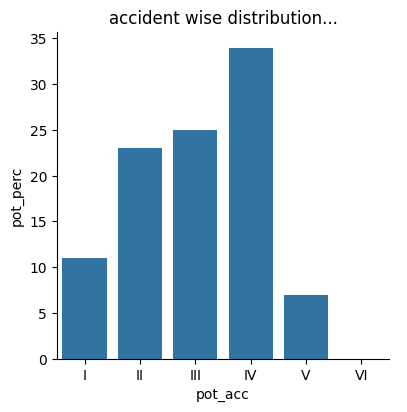

In [38]:
acc_cnt = np.round(is_df['Accident Level'].value_counts(normalize=True) * 100)
acc_cnt = pd.DataFrame({'acc':acc_cnt.index, 'perc':acc_cnt.values})
pot_acc_cnt = np.round(is_df['Potential Accident Level'].value_counts(normalize=True) * 100)
pot_acc_cnt = pd.DataFrame({'pot_acc':pot_acc_cnt.index, 'pot_perc':pot_acc_cnt.values})
acc_cnt = acc_cnt.sort_values(by=['acc'], ascending=True).reset_index(drop=True)
pot_acc = pot_acc_cnt.sort_values(by=['pot_acc'], ascending=True).reset_index(drop=True)
result = pd.concat([acc_cnt, pot_acc], axis=1, join="outer")
result.fillna(0, inplace=True)
fig = sns.catplot(
    data=result, x="pot_acc", y="pot_perc",
    kind="bar", height=4, 
).set(title='accident wise distribution...')

# Treating Attribute data

In [39]:
# Label encoding
is_df['Gender'] = is_df['Gender'].apply(lambda x: {'Male': 0, 'Female': 1}[x])
is_df['Accident Level'] = is_df['Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}[x])
is_df['Potential Accident Level'] = is_df['Potential Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}[x])

is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    int64         
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 32.8+ KB


In [40]:
# Dropping datetime info
is_df.drop(['Date'], axis=1, inplace=True)

In [41]:
# One-hot encoding
is_df = pd.get_dummies(is_df, columns=['Country', 'Local', 'Industry Sector', 'Employee or Third Party', 'Critical Risk'], dtype=np.int64)

In [42]:
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Accident Level                                           418 non-null    int64 
 1   Potential Accident Level                                 418 non-null    int64 
 2   Gender                                                   418 non-null    int64 
 3   Description                                              418 non-null    object
 4   Country_Country_01                                       418 non-null    int64 
 5   Country_Country_02                                       418 non-null    int64 
 6   Country_Country_03                                       418 non-null    int64 
 7   Local_Local_01                                           418 non-null    int64 
 8   Local_Local_02                          

In [43]:
is_df.to_csv(f'{PROJECT_DIR}/data/processed/iad-text_untreated.csv', index=False)

# Description

In [88]:
# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')  

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nehag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
# To lowercase
is_df['Description_T'] = is_df['Description'].apply(lambda x: x.lower())

In [92]:
# Removing non-alphanumeric chars
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ''.join(re.sub('[^A-Za-z0-9]+', ' ', x)))

In [94]:
# Removing extra white spaces
is_df['Description_T'] = is_df['Description_T'].str.strip()

In [96]:
# Stopword removal
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [98]:
is_df.loc[0:10, ['Description', 'Description_T']]

,Description,Description_T
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unloading operation ustulado bag need unclog d...
6,The collaborator reports that he was on street...,collaborator reports street 09 holding left ha...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sitting resting area level 326 raise ...
9,At the moment the forklift operator went to ma...,moment forklift operator went manipulate big b...


In [100]:
#dataset will be used for BOW/N-gram
is_df1=is_df.copy()

In [102]:
#Lemmitization
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
is_df['Description_WL'] = is_df.apply(lambda row: nltk.word_tokenize(row['Description_T']), axis=1)
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return ' '.join(new_words)
is_df['Description_WL'] = is_df.apply(lambda x: lemmatize_list(x['Description_WL']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nehag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [104]:
is_df.loc[0:10, ['Description', 'Description_WL']]

,Description,Description_WL
0,While removing the drill rod of the Jumbo 08 f...,remove drill rod jumbo 08 maintenance supervis...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump pip uncouple s...
2,In the sub-station MILPO located at level +170...,sub station milpo locate level 170 collaborato...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unload operation ustulado bag need unclog disc...
6,The collaborator reports that he was on street...,collaborator report street 09 hold leave hand ...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sit rest area level 326 raise bore su...
9,At the moment the forklift operator went to ma...,moment forklift operator go manipulate big bag...


# TF-IDF

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_df = pd.DataFrame()
for i in [1,2]:
    tfidf = TfidfVectorizer(max_features=50, stop_words='english',use_idf=True, ngram_range=(i,i))
    X = tfidf.fit_transform(is_df['Description_WL']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in tfidf.get_feature_names_out()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.head(5)

,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_carry,TFIDF_cause,TFIDF_clean,TFIDF_collaborator,TFIDF_come,...,TFIDF_safety gloves,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_transfer medical,TFIDF_use safety,TFIDF_wear safety,TFIDF_work area,TFIDF_worker wear
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.473920,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.259838,0.000000,0.0,0.169450,0.0,0.531202,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.331691,0.000000,0.333896,0.0,0.195598,0.0,0.000000,0.350788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.297918,0.000000,0.000000,0.0,0.175682,0.0,0.000000,0.315070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
nlp_chatbot_TF_IDF= is_df.join(tfidf_df.reset_index(drop=True))

In [115]:
nlp_chatbot_TF_IDF.drop(['Description','Description_T','Description_WL'],axis=1,inplace=True)

In [117]:
nlp_chatbot_TF_IDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 157 entries, Accident Level to TFIDF_worker wear
dtypes: float64(100), int64(57)
memory usage: 512.8 KB


In [119]:
nlp_chatbot_TF_IDF.to_csv('nlp_chatbot_TF_IDF.csv', index=False)

# BOW

In [122]:
# Stemming
ps = PorterStemmer()
is_df1['Description_PS'] = is_df1['Description_T'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
is_df1.loc[0:10, ['Description', 'Description_PS']]

,Description,Description_PS
0,While removing the drill rod of the Jumbo 08 f...,remov drill rod jumbo 08 mainten supervisor pr...
1,During the activation of a sodium sulphide pum...,activ sodium sulphid pump pipe uncoupl sulfid ...
2,In the sub-station MILPO located at level +170...,sub station milpo locat level 170 collabor exc...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approxim nv 1880 cx 695 ob7 personnel beg...
4,Approximately at 11:45 a.m. in circumstances t...,approxim 11 45 circumst mechan anthoni group l...
5,During the unloading operation of the ustulado...,unload oper ustulado bag need unclog discharg ...
6,The collaborator reports that he was on street...,collabor report street 09 hold left hand volum...
7,"At approximately 04:50 p.m., when the mechanic...",approxim 04 50 p mechan technician jo tecnomin...
8,Employee was sitting in the resting area at le...,employe sit rest area level 326 rais bore suff...
9,At the moment the forklift operator went to ma...,moment forklift oper went manipul big bag biox...


In [124]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)
bow_feat = bow_vec.fit_transform(is_df1['Description_PS'])

bow_feat = bow_feat.toarray()
bow_feat.shape

(418, 1000)

In [126]:
# Set of unique words considered by the vectorizer
bow_vec.get_feature_names_out()

array(['00', '01', '018', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '100', '11', '12', '13', '14', '15', '16', '17', '1710',
       '18', '1850', '187', '1880', '19', '1940', '1st', '20', '200',
       '2016', '2017', '22', '24', '25', '26', '27', '2900', '2930',
       '2995', '2m', '2nd', '30', '326', '3300', '3450', '3490', '35',
       '350', '3cm', '3m', '3rd', '40', '440', '45', '4th', '50', '500',
       '54', '5th', '60', '6m', '70', '75', '80', '90', '903', 'abl',
       'abruptli', 'absorb', 'access', 'accessori', 'accid', 'accident',
       'accommod', 'accompani', 'accord', 'accumul', 'acid', 'across',
       'action', 'activ', 'addit', 'adjust', 'advanc', 'affect', 'ahead',
       'aid', 'air', 'albino', 'align', 'allerg', 'allergi', 'alon',
       'along', 'alpha', 'alreadi', 'aluminum', 'amount', 'ampoload',
       'anchor', 'anfoload', 'angl', 'ankl', 'anod', 'anoth', 'appar',
       'appli', 'approach', 'approx', 'approxim', 'arc', 'area',
       'ar

In [128]:
bow_df = pd.DataFrame(bow_feat, columns=[f'cv_{vec}' for vec in bow_vec.get_feature_names_out()])
bow_df.head()

,cv_00,cv_01,cv_018,cv_02,cv_03,cv_04,cv_05,cv_06,cv_07,cv_08,...,cv_wore,cv_work,cv_worker,cv_workshop,cv_would,cv_wound,cv_wrench,cv_wrist,cv_zinc,cv_zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
bow_ds = pd.concat([is_df1, bow_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
bow_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 1057 entries, Accident Level to cv_zone
dtypes: int64(1057)
memory usage: 3.4 MB


In [134]:
bow_ds.to_csv('ps_bow.csv', index=False)

In [136]:
bow_ds.shape

(418, 1057)

# N-Gram

In [139]:
# Initializing CountVectorizer with top 1000 words
n2g_vec = CountVectorizer(max_features = 1000, ngram_range=(2, 2))
n2g_feat = n2g_vec.fit_transform(is_df1['Description_PS'])

n2g_feat = n2g_feat.toarray()
n2g_feat.shape

(418, 1000)

In [141]:
# Set of unique words considered by the vectorizer
n2g_vec.get_feature_names_out()

array(['00 approxim', '00 pm', '02 2017', '02 employe', '02 sting',
       '02bp0166 chang', '031 remov', '04 member', '10 00', '10 cm',
       '10 day', '10 mr', '10mx0 40m', '11 45', '12 20', '12 cell',
       '13 40', '15 20', '15 kg', '15 meter', '15 oper', '15mx0 10m',
       '16 oper', '1710 cx', '18 40', '1880 cx', '1st degre', '20 meter',
       '2nd finger', '30 approxim', '40 hour', '45 pm', '50 approxim',
       '50 meter', '500 kg', '5th finger', 'access aripuan',
       'access ladder', 'accid employe', 'accid oper', 'accid victim',
       'accid worker', 'accompani geologist', 'activ area',
       'activ employe', 'activ evacu', 'activ follow', 'activ paralyz',
       'activ remov', 'air valv', 'allerg reaction', 'ampoload team',
       'approx 500', 'approxim 20', 'approxim height', 'approxim meter',
       'approxim nv', 'area allerg', 'area proceed', 'area stop',
       'area supervis', 'area verifi', 'aripuan area', 'arm one',
       'arm right', 'arm uniform', 'aroun

In [143]:
n2g_df = pd.DataFrame(n2g_feat, columns=[f'cv_{vec}' for vec in n2g_vec.get_feature_names_out()])
n2g_df.head()

,cv_00 approxim,cv_00 pm,cv_02 2017,cv_02 employe,cv_02 sting,cv_02bp0166 chang,cv_031 remov,cv_04 member,cv_10 00,cv_10 cm,...,cv_worker use,cv_worker wear,cv_workshop level,cv_would enter,cv_wound left,cv_wound right,cv_wound sole,cv_wrist left,cv_zaro team,cv_zinc sheet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
n2g_ds = pd.concat([is_df1, n2g_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
n2g_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 1057 entries, Accident Level to cv_zinc sheet
dtypes: int64(1057)
memory usage: 3.4 MB


In [147]:
n2g_ds.to_csv('ps_bigram.csv', index=False)

In [149]:
n2g_ds.shape

(418, 1057)

In [153]:
# Trigram
n3g_vec = CountVectorizer(max_features = 1000, ngram_range=(3, 3))
n3g_feat = n3g_vec.fit_transform(is_df1['Description_PS'])
n3g_feat = n3g_feat.toarray()
n3g_df = pd.DataFrame(n3g_feat, columns=[f'cv_{vec}' for vec in n3g_vec.get_feature_names_out()])
n3g_ds = pd.concat([is_df1, n3g_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
n3g_ds.to_csv('ps_trigram.csv', index=False)
n3g_vec.get_feature_names_out()

array(['02 2017 10', '02 employe insid', '02 sting belli',
       '02bp0166 chang intern', '031 remov suction', '04 member wca',
       '10 50 approxim', '10m impact basket', '10mx0 40m impact',
       '13 40 hour', '15mx0 10m impact', '1710 cx 018', '18 40 hour',
       '1st degre burn', '20mx1 10mx0 40m', '2mx0 15mx0 10m',
       '2nd finger left', '350 meter main', '37km accord inthinc',
       '40 hour mr', '40m impact ampoload', '4288 unexpectedli climb',
       '50 kv lt', '50 meter look', '500 kg 20mx1', '5th finger right',
       '878 return citi', '903 licens plate', 'access aripuan area',
       'access divin assist', 'access machet moment', 'access posit ramp',
       'accid drill assist', 'accid employe use', 'accid truck travel',
       'accid welder use', 'accid worker use', 'accid worker wear',
       'accord inthinc width', 'acid leach stage', 'acid spill line',
       'activ carri pump', 'activ chuteo ore', 'activ employe evalu',
       'activ encount ciliari', 'activ 

In [155]:
n3g_ds.shape

(418, 1057)

# Model Development

In [183]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_bow = pd.read_csv("ps_bow.csv")
safety_df_bow.name = "BOW"
safety_df_bigram = pd.read_csv("ps_bigram.csv")
safety_df_bigram.name = "BIGRAM"
safety_df_trigram = pd.read_csv("ps_trigram.csv")
safety_df_trigram.name = "TRIGRAM"
safety_df_tfidf = pd.read_csv("nlp_chatbot_TF_IDF.csv")
safety_df_tfidf.name = "TFIDF"

In [3]:
# Function to display the dataset shape

def display_df(df_name):
    # Displaying the shape of the dataframe
    print("Shape of dataframe", df_name.name)
    print(df_name.shape)

In [4]:
# Function to upsample the target variable

def upsample_df(df_name):

    """
    Upsamples the minority class in the given DataFrame using SMOTE and splits the data into training and test sets.

    Parameters:
    df_name (pd.DataFrame): The DataFrame containing the data to be upsampled and split.

    Returns:
    tuple: A tuple containing:
        - X_train (pd.DataFrame): The features of the training data.
        - y_train (pd.Series): The target variable of the training data.
        - X_test (pd.DataFrame): The features of the test data.
        - y_test (pd.Series): The target variable of the test data.
    """
    
    # Getting the unique value counts from the target column
    print("Displaying the unique values of target column for dataframe", df_name.name)
    print(df_name['Accident Level'].value_counts())
    # Splitting the data
    X = df_name.drop(columns='Accident Level')
    y = df_name['Accident Level']
    smote = SMOTE()
    # Upsampling the data
    X_smote, y_smote = smote.fit_resample(X,y)
    
    # Displaying the shape of the dataframe after upsampling
    print("The shape for data frame X")
    print(X_smote.shape)
    print("The shape for data frame y")
    print(y_smote.shape)
    print('Unique Values for the target variable after sampling:')
    print(y_smote.value_counts())
    
    # Splitting the training data and test data in 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)
    
    # Displaying the shape of dataframe after split
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [5]:
# Declaring a list containing the dataframe
dataframe_list = [safety_df_bow, safety_df_bigram, safety_df_trigram, safety_df_tfidf]

# Calling the function to display the dataframe shape
for df_name in dataframe_list:
    display_df(df_name)

Shape of dataframe BOW
(418, 1057)
Shape of dataframe BIGRAM
(418, 1057)
Shape of dataframe TRIGRAM
(418, 1057)
Shape of dataframe TFIDF
(418, 157)


In [6]:
# Designing the dataframe to document the model performance

All_Model_Results = pd.DataFrame(columns=['Model Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [7]:
# Function to generate the model performance and the classification report

def Generate_Classification_Report(model_name, model_print_name):

    """
    Generates classification reports for a given model and adds the model's performance metrics to a global results table.

    Parameters:
    model_name (sklearn.base.BaseEstimator): The trained machine learning model to evaluate.
    model_print_name (str): The name of the model to be printed in the results table.

    Returns:
    tuple: A tuple containing:
        - y_train (array-like): The true labels for the training data.
        - y_train_pred (array-like): The predicted labels for the training data.
        - y_test (array-like): The true labels for the test data.
        - y_test_pred (array-like): The predicted labels for the test data.
    """
    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Generating different parameters in model performance 
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    train_recall = metrics.recall_score(y_train, y_train_pred, average='macro')
    test_recall = metrics.recall_score(y_test, y_test_pred, average='macro')
    train_precision = metrics.precision_score(y_train, y_train_pred, average='macro')
    test_precision = metrics.precision_score(y_test, y_test_pred, average='macro')
    
    # Adding the model performance in the table for the final evaluation
    All_Model_Results.loc[len(All_Model_Results.index)] = [model_print_name, train_accuracy, test_accuracy,
                                                          train_recall,test_recall,train_precision,test_precision]  

    # Returning the relevant training, test and predicted data to generate the classification report
    return y_train, y_train_pred, y_test, y_test_pred

In [8]:
# Function to generate the confusion matrix for the models

def Generate_Confusion_Metrics(model_name):
    """
    Generates confusion matrices for a given model on both training and test datasets.

    Parameters:
    model_name (sklearn.base.BaseEstimator): The trained machine learning model to evaluate.

    Returns:
    tuple: A tuple containing:
        - df_cmatrix_train (pd.DataFrame): The confusion matrix for the training data.
        - df_cmatrix_test (pd.DataFrame): The confusion matrix for the test data.
    """
    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Creating confusion matrix for training data
    c_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    df_cmatrix_train = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])
    
    # Creating confusion matrix for test data
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    df_cmatrix_test = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])

    # Returning confusion matrix for training data and test data
    return df_cmatrix_train, df_cmatrix_test

In [9]:
# Function to execute the Grid Search for the hyperparameters

def Execute_GridSearch_Store_Results(model_name, Grid_params):
    """
    Executes GridSearchCV on the provided model with given hyperparameters, stores the results,
    and returns the best performing hyperparameters.

    Parameters:
    model_name (sklearn.base.BaseEstimator): The machine learning model to be tuned.
    Grid_params (dict): Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.

    Returns:
    dict: The best performing hyperparameters found by GridSearchCV.
    """
    
    GS_Model = GridSearchCV(model_name, param_grid=Grid_params,
                           cv=5, verbose=1, n_jobs=-1)
    
    # Calculating the grid search result for the hyper parameters
    GS_Model.fit(X_train,y_train)
    GridS_results = pd.DataFrame(GS_Model.cv_results_)
    
    # Finding out the best performed parameters
    GridS_results.sort_values(by=['rank_test_score'],ascending=True) 
    print('The best results are ', GS_Model.best_params_)
    
    # Returning the best performed parameters
    return(GS_Model.best_params_)

In [10]:
# We will define the function to build and tune the following classifier models:
# SVM, Logistic Regression, KNN, Decision Tree, Random Forest, Adaptive Boosting and Gradient Boosting.
# We will first build a basic model for each algorithm mentioned above. 
# Then we will perform Grid Search to tune the model.
# We are defining 2 dictionary to store the classification reports and the confusion matrices.
# We will print those to compare the top performing models.
    
# Declaring hyper parameters for different models using gridsearch

# Parameters for SVM
GS_SVM_params = {
    "gamma": [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    "C": range(1,15),
    'kernel': ['linear','rbf']
}


# Parameters for Logistic Regression
GS_LR_params = {'C' : [1, 2, 4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 1500]
}

# Parameters for KNN
GS_KNN_params = {
    "n_neighbors":range(3,12,2),
    "weights":['uniform', 'distance'],
    "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameters for Decision Tree
GS_DT_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['auto','sqrt','log2']
}

# Parameters for Random Forest
GS_RF_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,8),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['sqrt','log2'],
    'n_estimators': range(20,100,20)
}

# Parameters for Adaptive Boosting
GS_ABCL_params = {
    'n_estimators': range(10,100,10),
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Parameters for Gradient Boosting
GS_GBCL_params = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : range(50, 120, 20),
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : range(2, 9, 3),
    'min_samples_leaf' : [3, 4, 5]
}

model_num = 0
# Dictionary to store the classification report
class_matrix = {}
# Dictionary to store the classification matrix
conf_matrix = {}

# Defining the function for the model building
def model_building(df_name, X_train, y_train, X_test, y_test):

    """
    Builds and evaluates multiple machine learning models using the provided training and test data.
    It performs the following steps for each model:
    - Initial model training
    - Classification report generation
    - Confusion matrix generation
    - Hyperparameter tuning using GridSearchCV
    - Retraining with the best hyperparameters
    - Evaluation of the tuned model

    Parameters:
    df_name (pandas.DataFrame): The DataFrame containing the dataset (used for naming models).
    X_train (pandas.DataFrame): Training feature set.
    y_train (pandas.Series): Training target variable.
    X_test (pandas.DataFrame): Test feature set.
    y_test (pandas.Series): Test target variable.
    
    Returns:
    None

    Following models have been trained and tuned using grid search

    Support Vector Machine (SVM):
    Initial Model: Uses gamma=0.025 and C=3.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    Logistic Regression:
    Initial Model: Uses default parameters.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    K-Nearest Neighbors (KNN):
    Initial Model: Uses n_neighbors=5.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    Decision Tree:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.    
    
    Random Forest:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    AdaBoost:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    Gradient Boosting:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    """
    
    global model_num

    ##################################################################################################################
    
    # Instantiating SVM model
    clf_svm = svm.SVC(gamma=0.025, C=3) 
    clf_svm.fit(X_train , y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Initial Model " + df_name.name
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    
    clf_svm_tune = svm.SVC()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_svm_tune, GS_SVM_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    clf_svm = svm.SVC(**best_param) 
    clf_svm.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Tuned Model " + df_name.name    
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    ##################################################################################################################
    # Instantiating Logistic Regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(lr_model, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(lr_model)
    
    clf_lr_tune = LogisticRegression()   
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_lr_tune, GS_LR_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    lr_model = LogisticRegression(**best_param)
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    ##################################################################################################################
    # Instantiating KNN model
    KNN = KNeighborsClassifier(n_neighbors= 5)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)
    
    KNN_tune = KNeighborsClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(KNN_tune, GS_KNN_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    KNN = KNeighborsClassifier(**best_param)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)

    ##################################################################################################################
    # Instantiating Decision Tree model
    dTree = DecisionTreeClassifier(random_state = 1)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)

    dTree_GS = DecisionTreeClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(dTree_GS,GS_DT_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    dTree = DecisionTreeClassifier(**best_param)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)

    ##################################################################################################################
    # Instantiating Random Forest model
    rfcl = RandomForestClassifier(random_state = 1)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)
   
    rfcl_GS = RandomForestClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(rfcl_GS, GS_RF_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    rfcl = RandomForestClassifier(**best_param)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)

    ##################################################################################################################
    # Instantiating AdaBoost model
    abcl = AdaBoostClassifier(random_state = 1)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)
    
    abcl_GS = AdaBoostClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(abcl_GS,GS_ABCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    abcl = AdaBoostClassifier(**best_param)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)

    ##################################################################################################################
    # Instantiating Gradient Boosting model
    gbcl = GradientBoostingClassifier(random_state=1)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Initial Model " + df_name.name
    model_num=model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    gbcl_GS = GradientBoostingClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(gbcl_GS, GS_GBCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    gbcl = GradientBoostingClassifier(**best_param)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    model_num = model_num + 1

In [11]:
# Calling the model building functions for each dataset
for df_name in dataframe_list:
    X_train, y_train, X_test, y_test = upsample_df(df_name)
    model_building(df_name, X_train, y_train, X_test, y_test)

Displaying the unique values of target column for dataframe BOW
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best results are  {'C': 14, 'gamma': 0.025, 'kernel': 'rbf'}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'sag'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best results are  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
The best re

In [12]:
# Displaying the model performance
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
0,SVM Initial Model BOW,0.976537,0.899676,0.976746,0.894315,0.976568,0.900849
1,SVM Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
2,Logistic Regression Initial Model BOW,0.985437,0.912621,0.985638,0.912371,0.985678,0.909061
3,Logistic Regression Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
4,KNN Initial Model BOW,0.800971,0.728155,0.797782,0.737793,0.856606,0.591923
5,KNN Tuned Model BOW,0.852751,0.754045,0.850149,0.768308,0.888723,0.748776
6,Decision Tree Initial Model BOW,0.998382,0.857605,0.998333,0.856767,0.998444,0.852501
7,Decision Tree Tuned Model BOW,0.544498,0.508091,0.548504,0.492490,0.585410,0.543033
8,Random Forest Initial Model BOW,0.998382,0.915858,0.998382,0.917332,0.998391,0.914731
9,Random Forest Tuned Model BOW,0.870550,0.773463,0.870723,0.768020,0.870827,0.765062


In [13]:
# Designing the dataframe to document the model performance average for each dataset

All_Dataset_Average = pd.DataFrame(columns=['Dataset Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [14]:
# Function to calculate the average training and testing accuracy, recall and precision specific to each dataset 
def result_avg(df_name):

     """
    Calculate the average performance metrics for models associated with a specific dataset and store the results.

    This function iterates over a global DataFrame `All_Model_Results` that contains model performance metrics for various datasets.
    It calculates the average training and testing accuracy, recall, and precision for models associated with the dataset named `df_name`.
    The calculated averages are then stored in another global DataFrame `All_Dataset_Average`.

    Parameters:
    -----------
    df_name : pandas.DataFrame
        The DataFrame object whose name attribute is used to filter models in `All_Model_Results`.

    Returns:
    --------
    None

    Global Variables:
    -----------------
    All_Model_Results : pandas.DataFrame
        A DataFrame that contains the performance metrics of various models.
        Columns should include: 'Model Name', 'Training Accuracy', 'Testing Accuracy', 'Training Recall', 'Testing Recall', 'Training Precision', 'Testing Precision'.
    
    All_Dataset_Average : pandas.DataFrame
        A DataFrame that stores the average performance metrics for each dataset.
        Columns should include: 'Dataset Name', 'Average Training Accuracy', 'Average Testing Accuracy', 'Average Training Recall', 'Average Testing Recall', 'Average Training Precision', 'Average Testing Precision'.

    """

    
    row_count = 0
    train_acc = 0
    test_acc = 0
    train_rec = 0
    test_rec = 0
    train_prec = 0
    test_prec = 0
    
    # Summing up all the parameters for each dataset
    for i in All_Model_Results.index:
        if(All_Model_Results['Model Name'][i]).endswith(df_name.name):
            train_acc = train_acc + All_Model_Results['Training Accuracy'][i]
            test_acc = test_acc + All_Model_Results['Testing Accuracy'][i]
            train_rec = train_rec + All_Model_Results['Training Recall'][i] 
            test_rec = test_rec + All_Model_Results['Testing Recall'][i]
            train_prec = train_prec + All_Model_Results['Training Precision'][i]
            test_prec = test_prec + All_Model_Results['Testing Precision'][i]
            
            row_count = row_count + 1
    
    #Calculating the average of all the parameters for each dataset
    train_acc_avg = train_acc/row_count
    test_acc_avg = test_acc/row_count
    train_rec_avg = train_rec/row_count
    test_rec_avg = test_rec/row_count
    train_prec_avg = train_prec/row_count
    test_prec_avg = test_prec/row_count
    
    # Adding the model performance in the table for the final evaluation
    All_Dataset_Average.loc[len(All_Dataset_Average.index)] = [df_name.name, train_acc_avg, test_acc_avg,
                                                          train_rec_avg, test_rec_avg, train_prec_avg, test_prec_avg]

In [15]:
# Calling the function to calculate the average for the parameters for each dataset
for df_name in dataframe_list:
    result_avg(df_name)

In [16]:
# Sorting the performance related parameters for each dataset based on the Testing Accuracy
All_Dataset_Average = All_Dataset_Average.sort_values(by = 'Testing Accuracy', ascending = False)
All_Dataset_Average

,Dataset Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
3,TFIDF,0.918458,0.870319,0.917998,0.873446,0.912485,0.864475
0,BOW,0.863384,0.789413,0.862986,0.790302,0.862095,0.771524
1,BIGRAM,0.796001,0.714979,0.795803,0.715971,0.813475,0.737809
2,TRIGRAM,0.768551,0.678456,0.768050,0.679666,0.779217,0.678151


# Final verdict on pre processing methods

As is evident from the above step, TFIDF gives the best result. So going forward we should use just this as one pre processing method. 

However, this detailed model evaluation method was necessary to be a 100% sure about which pre processing method would work best.

It stands way beyond most other methods

In [17]:
# Displaying the model performance sorted by Testing Accuracy percentage of the model
All_Model_Results = All_Model_Results.sort_values(by = 'Testing Accuracy', ascending = False) 
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
50,Random Forest Initial Model TFIDF,0.999191,0.977346,0.999222,0.977469,0.999170,0.976946
45,Logistic Regression Tuned Model TFIDF,0.997573,0.970874,0.997569,0.973221,0.997566,0.968596
43,SVM Tuned Model TFIDF,0.997573,0.970874,0.997569,0.973221,0.997566,0.968596
51,Random Forest Tuned Model TFIDF,0.977346,0.941748,0.977632,0.942192,0.977674,0.940052
44,Logistic Regression Initial Model TFIDF,0.958738,0.941748,0.958928,0.942911,0.958579,0.938984
55,Gradient Boost Tuned Model TFIDF,0.999191,0.928803,0.999222,0.928443,0.999170,0.924836
42,SVM Initial Model TFIDF,0.939320,0.928803,0.938944,0.929991,0.940128,0.927481
1,SVM Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
3,Logistic Regression Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
8,Random Forest Initial Model BOW,0.998382,0.915858,0.998382,0.917332,0.998391,0.914731


In [18]:
# The index of the models for the 5 best performing models
model_index = All_Model_Results.head(5).index

# Creating the Classification Reports for the 5 best performing models
for i in model_index:
    print("Classition Report for Model number", i)
    print("Train Classification Report for " + All_Model_Results['Model Name'][i])
    print(metrics.classification_report(class_matrix[i][0], class_matrix[i][1]));

    print ("\n")

    print("Test Classification Report for " + All_Model_Results['Model Name'][i])
    print(metrics.classification_report(class_matrix[i][2], class_matrix[i][3]));
    print("===")

Classition Report for Model number 50
Train Classification Report for Random Forest Initial Model TFIDF
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report for Random Forest Initial Model TFIDF
              precision    recall  f1-score   support

           1       0.95      0.94      0.95        67
           2       0.98      0.96      0.97        52
           3       0.96      1.00      0.98        54
           4       0.99      0.99      0.99        69
           5       1.00      1.00      1.00        67

    accuracy  

Model Number 50
Random Forest Initial Model TFIDF


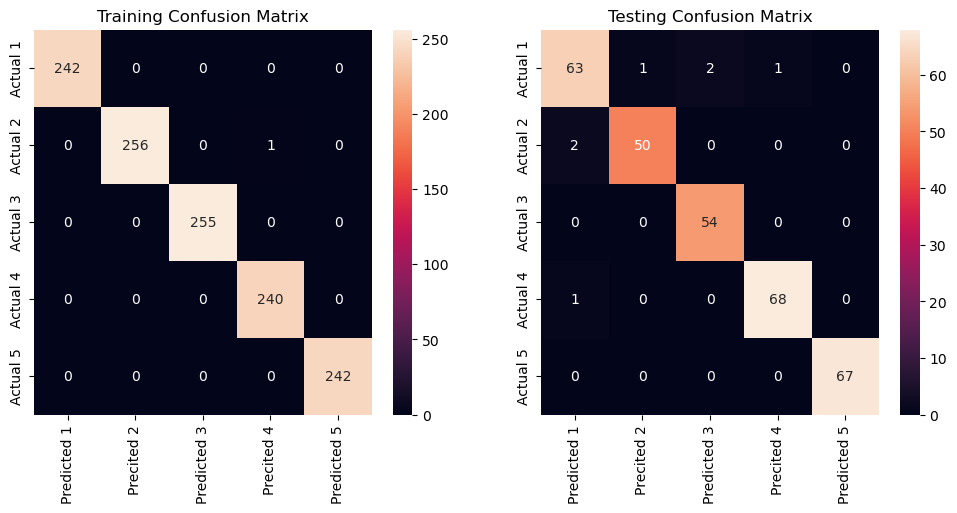

Model Number 45
Logistic Regression Tuned Model TFIDF


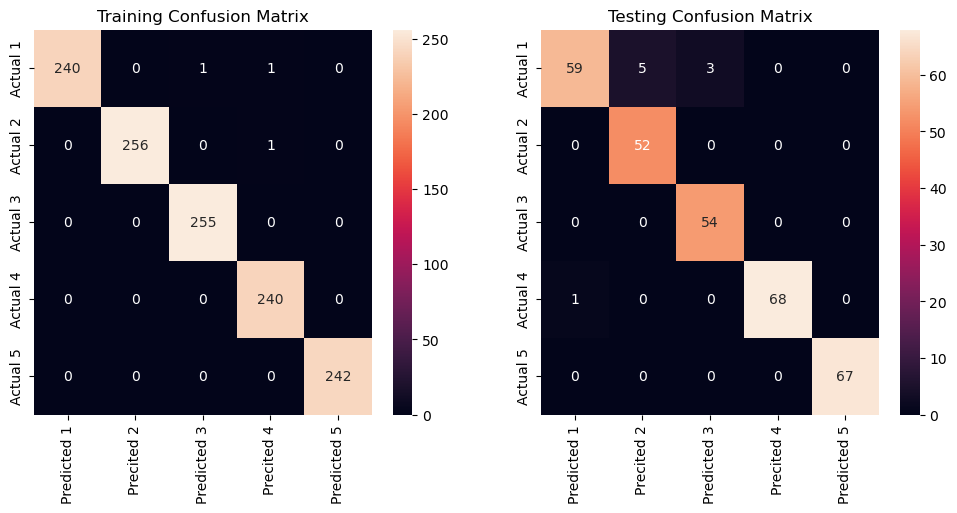

Model Number 43
SVM Tuned Model TFIDF


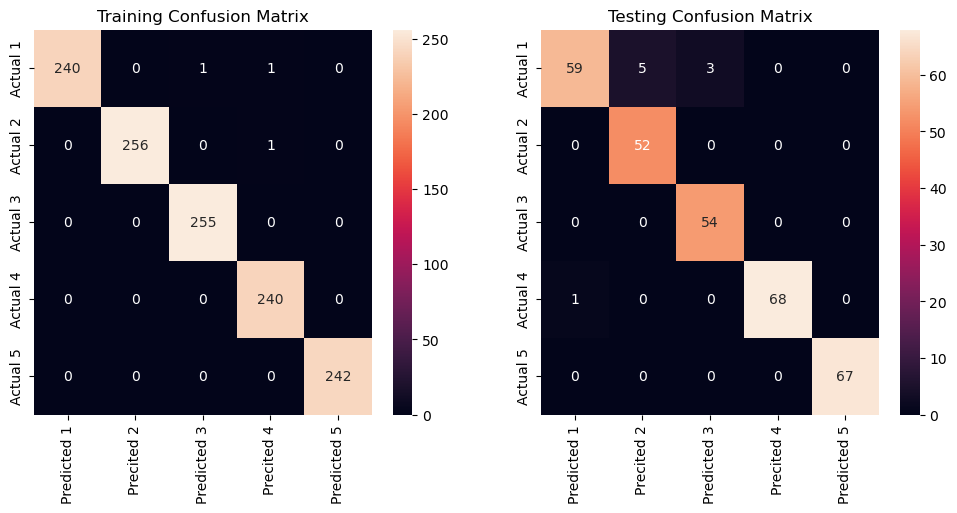

Model Number 51
Random Forest Tuned Model TFIDF


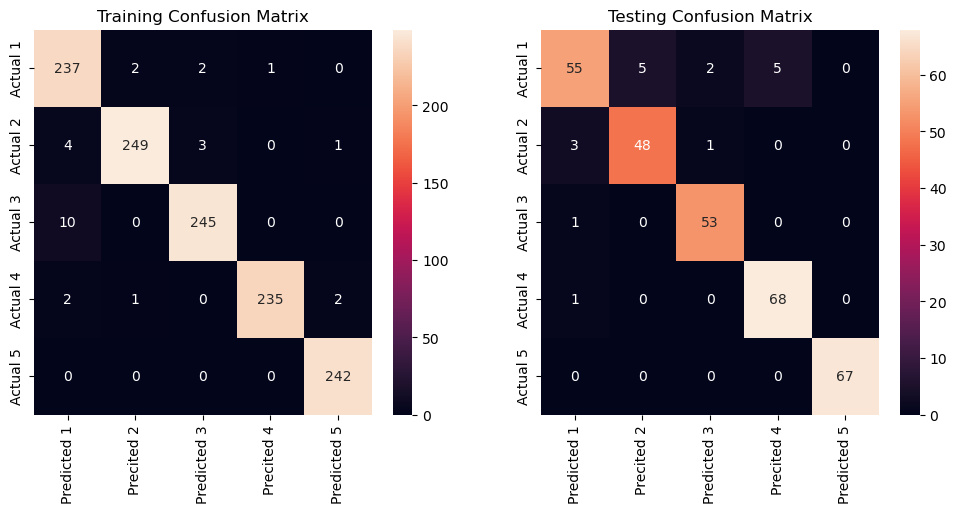

Model Number 44
Logistic Regression Initial Model TFIDF


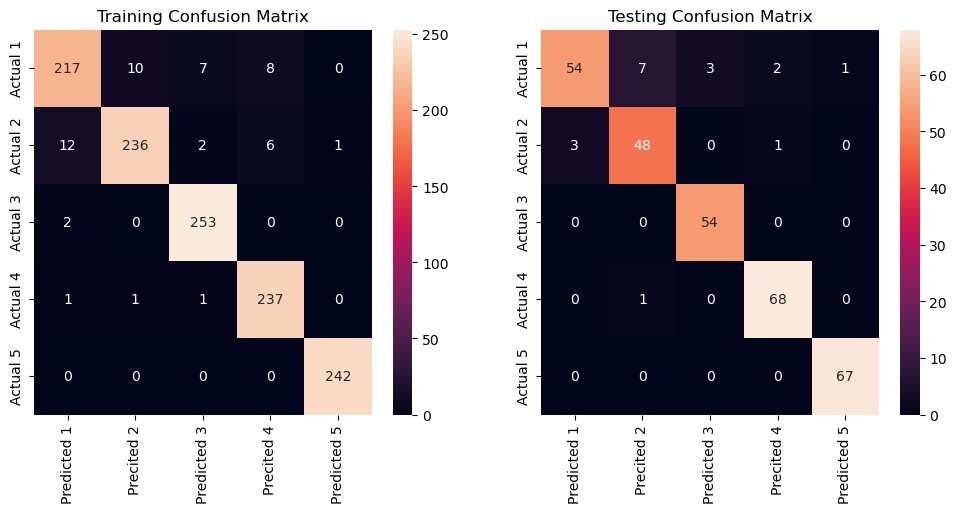

In [19]:
# Creating the Confusion Matrices for the 5 best performing models

for i in model_index:  
    print("========================================")
    print("Model Number", i)
    print(All_Model_Results['Model Name'][i])
    print("========================================")
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.set_title('Training Confusion Matrix')
    sns.heatmap(conf_matrix[i][0], annot=True, fmt='.0f', ax=ax1)

    ax2.set_title('Testing Confusion Matrix')
    sns.heatmap(conf_matrix[i][1], annot=True, fmt='.0f', ax=ax2)

    plt.show()

# Final verdict on the classification model

The best model was a random forest model with TF IDF pre processing.

Got almost 98% of Accuracy, precision & recall for the testing data. The similar no. for training data was close to 100%. Seeing both the numbers, we can be confident that this is a good fit.

The testing confusion matrix for the same model shows just 7 misclassification.

Very happy with the results, model training & the overall approach taken to reach such good results.